### Come impara il Perceptron di Rosenblatt:

Si basa su un approccio riduzionista che replica il funzionamento del neurone cerebrale il quale *reagisce* o *non reagisce*. \
Si parte quindi definendo una funzione decisionale a passo unitario, $\phi(z)$ che prende una combinazione lineare (**z**) tra il vettore dei valori di input $\mathbf{x}$ ed un corrispondente vettore dei pesi $\mathbf{w}$ e lo trasforma in un output binario (+1; -1) che nel nostro caso rappresenterà il valore dell'etichetta della classe che viene predetta.

La funzione decisionale contiene una soglia $\theta$ di attivazione, quando z è maggiore della soglia la funzione restituisce 1, altrimenti -1. Questo ci permette di definire un peso zero $w_0=-\theta$, per tanto possiamo scrivere: \
$z = w_0x_0 +...+ w_mx_m = \mathbf{w^{T}x}$ 

Possiamo descrivere l'algoritmo di un *Perceptron* in questo modo:
1. Inizializzare i pesi a 0 o a piccoli numeri casuali
2. Per ogni campione di addestramento $\mathbf{x}^{(i)}$ :
   - Calcolare il valore di output $\hat{y}$
   - Aggiornare i pesi

L'aggiornamento del vettore dei pesi $\mathbf{w}$ è definito come: \
$w_j := w_j + \Delta w_j$ in cui $\Delta w_j = \eta (y^{(i)} - \hat{y}^{(i)})x_j^{(i)}$ \
Dove $\eta$ rappresenta il *tasso di apprendimento* (cioè una costante compresa tra 0.0 e 1.0)
che moltiplica la differenza tra l'effettiva etichetta della classe per l'i-esimo esempio di addestramento e l'etichetta della classe che è stata predetta (correttamente o meno che sia). \
Facciamo un esempio.  In un caso bidimensionale per uno scenario in cui il *Perceptron* predica correttamente avremo:
1. $y^{(i)} = -1$, $\hat{y}^{(i)} = -1$ *implica* $\Delta w_j= \eta(-1 - (-1))x_j^{(i)} = 0$ 
2. $y^{(i)} = 1$, $\hat{y}^{(i)} = 1$ *implica* $\Delta w_j= \eta(1 - (1))x_j^{(i)} = 0$\
Al contrario nel caso di una predizione errata i pesi verranno spinti verso la classe corretta: 
3. 1. $y^{(i)} = 1$, $\hat{y}^{(i)} = -1$ *implica* $\Delta w_j= \eta(1 - (-1))x_j^{(i)} = \eta (2)x_j^{(i)}$ 
4. 1. $y^{(i)} = -1$, $\hat{y}^{(i)} = 1$ *implica* $\Delta w_j= \eta(1 - (-1))x_j^{(i)} = \eta (-2)x_j^{(i)}$ 

Prendiamo come riferimento l'esempio 3 e supponiamo che $\eta = 1$, $x_j^{(i)}=0,5$ \
$\Delta w_j = (1-(-1))0,5 = (2)0,5 = 1$ \
In questo caso aumenteremo il peso corrispondente di 1 in modo che l'input della rete sia più positivo la prossima volta che verrà eseminato e per tanto sarà maggiore la probabilità di superare sopra la soglia della funzione a passo unitario. \
L'aggiornamento dei pesi è dunque proporzionale al valore $x_j$ ed è importante notare che tutti i pesi vengono aggiornati smultaneamente e solo dopo vengono ricalcolate le classi predette. \
**NB:** Il *Perceptron* può funzionare solo se le due classi sono separabili in modo lineare e se il tasso di apprendimento è sufficientemente piccolo. \
Se le due classi non fossero separabili linearmente il *Perceptron* non convergerebbe mai non smettendo mai di aggiornare il suo vettorei dei pesi. \
Per ovviare a tale problema si può definire un numero massimo di passi sul dataset di addestramento, quindi un numero massimo di aggiornamenti dei pesi. Tale soglia si chiama *EPOCHE*

In [68]:
#Imports librerie:
import numpy as np
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [64]:
# DEFINIZIONE DELLA CLASSE PERCEPTRON
# Per convenzione con il pedice "_" si indicano le variabili/attributi che 
#non vengono creati al momento dell'inizializzazione dell'oggetto

class Perceptron(object):
    """Perceptron Classifier
    Parametri:
    ---------------------------------------
    eta : float
        rappresenta il tasso di apprendimento (tra 0.0 e 1.0)
    n_iter: int
        rappresenta le Epoche, i passaggi sul training set
    random_state: int
        rappresenta il seed di generazione random per i pesi
    
    Attributi:
    ---------------------------------------
    w_ : 1d-array
        rappresenta l'arrey monodimensionale dei pesi dopo il fitting
    errors_ : list
        rappresenta la lista delle classificazioni errate (updates) in ogni epoca 
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """La funzione per fittare il dataset di addestramento:
        Parametri:
        ---------------------------------------
        X : {array-lie}, shape = [n_esempi, n_features]
            Il set dei vettori di allenamento, dove n_esempi è il numero di esempi
            mentre n_features è il numero delle features di ogni esempio
        y : array-like, shape = [n_esempi]
        rappresenta la variabile target da predirre
        
        Returns:
        ---------------------------------------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0,
                             scale=0.01,
                             size=1 + X.shape[1]
                             )
        self.errors_ = []
    
        for i in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
        
    def net_input(self, X):
        """Calcola l'input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Ritorna l'etichetta della classe dopo ogni step"""
        return np.where(self.net_input(X) > 0, 1, -1)

In [7]:
s = os.path.join("https://archive.ics.uci.edu", 
                "ml",
                "machine-learning-databases",
                "iris",
                "iris.data")
print("URL:", s)

URL: https://archive.ics.uci.edu\ml\machine-learning-databases\iris\iris.data


In [23]:
DATA_PATH = r"C:\Users\simon\OneDrive\Desktop\Formazione\Perceptron\data\in\iris.data"

In [29]:
df = pd.read_table(DATA_PATH, header=None, encoding="utf-8", sep=",")

In [31]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
df.shape

(150, 5)

In [33]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [40]:
#estraggo solo le prime 100 righe del dataset che corrispondono alle sole 2 classi
#Iris-Setosa ed Iris-Versicolor
#NB: Ricordiamoci che il Perceptron è un classificatore binario, quindi pur potendo utilizzare tutte le features che vogliamo
# Le classi devono essere SOLO 2 (si può implementare per la multi-class tramite l'approccio OvA (One VS All))

y = df.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", -1, 1) #trasformo le label da cateogriche a numeriche

X = df.iloc[0:100, [0, 2]].values #Estraiamo solo le features lungezza del sepalo e lunghezza del petalo

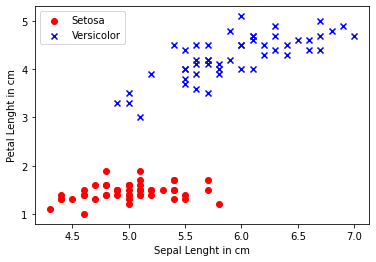

In [58]:
plt.scatter(X[:50, 0], X[:50, 1],
           color="red",
           marker="o",
           label="Setosa",
           )
plt.scatter(X[50:100, 0], X[50:100, 1],
           color="blue",
           marker="x",
           label="Versicolor")

plt.xlabel("Sepal Lenght in cm")
plt.ylabel("Petal Lenght in cm")
plt.legend(loc="upper left")
plt.show()

In [65]:
perceptron = Perceptron(eta=0.01, n_iter=10)
perceptron.fit(X, y)

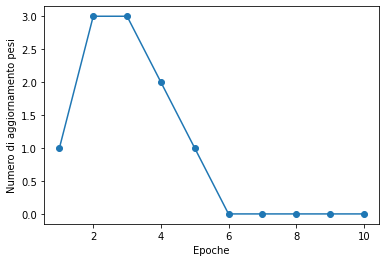

In [67]:
plt.plot(range(1, len(perceptron.errors_) +1),
        perceptron.errors_,
        marker="o"
        )
plt.xlabel("Epoche")
plt.ylabel("Numero di aggiornamento pesi")
plt.show()

In [78]:
def plot_decision_regions(X, y, classifier,test_idx=None, resolution=0.02):
    #setup marker generator and color map
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot decision surface
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() +1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot class examples:
    for idx, classe in enumerate(np.unique(y)):
        plt.scatter(x=X[y == classe, 0],
                   y=X[y == classe, 1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=classe,
                   edgecolors="black")
            #Highlight test samples
    if test_idx:
        #plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:,0], X_test[:,1], c ='', edgecolor = 'black',
        alpha=1.0, linewidth=1, marker='o', s=100, label='test set')
        

<ipython-input-78-0e1b7482a773>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == classe, 0],


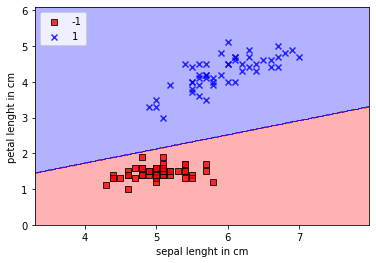

In [79]:
plot_decision_regions(X, y, classifier=perceptron)
plt.xlabel("sepal lenght in cm")
plt.ylabel("petal lenght in cm")
plt.legend(loc="upper left")
plt.show()